

# **Mielage Prediction - Regression Analysis**



**Source:**
This dataset was taken from the Statlib library which is maintained at the Carnegie Mellon University. This dataset was used in the 1983 American Statistical Association Exposition.

**Dataset Information:**
This dataset is a slgihtly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg, 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Attribute Information:**
1. mpg: continuous
2. cylinders: continuous
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string(unique for each instance)

# Import Library

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

# Import Data

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [11]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

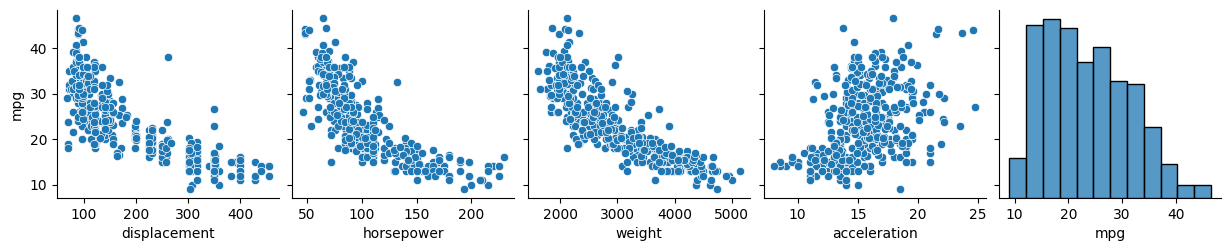

In [17]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

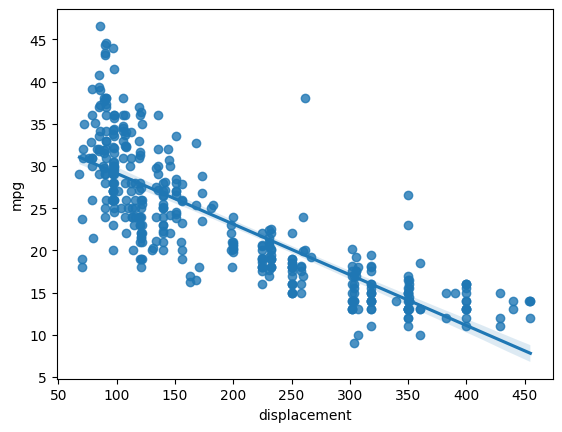

In [18]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# Define Target Variable y and Feature X

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [20]:
y = df['mpg']

In [21]:
y.shape

(392,)

In [22]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [23]:
x.shape

(392, 4)

# Scaling Data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
x = ss.fit_transform(x)

In [54]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [27]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**After standardization mean is zero and standard deviation is one**

# Train Test Split Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [30]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [34]:
lr.intercept_

23.55973133035045

In [35]:
lr.coef_

array([ 1.05448098, -1.98650101, -5.43092822,  0.52183611])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

# Predict Test Data

In [36]:
y_pred = lr.predict(xtest)

In [37]:
y_pred

array([26.36120531, 31.64471782, 24.74710025, 16.70612421, 33.01035057,
       21.09802728, 23.85099466, 11.95528049, 14.77041651, 26.91231403,
       15.84909058, 20.54686259,  9.67781012, 18.21699103, 27.3115184 ,
       10.63045342, 15.12353012, 27.77462619, 13.81788384, 22.17483389,
       30.06624594, 22.30016547, 18.7263759 , 24.66387435, 16.65616113,
       25.95011576, 18.83643099, 25.88809734, 30.50645263, 11.55905717,
       21.02582119, 23.74105787, 25.39674339, 17.67825134, 28.46686626,
       26.44965261, 27.36552634, 23.35018673, 21.95451139, 17.10160441,
       24.45234156, 11.39110442, 30.96518028, 28.949467  , 10.25566825,
       33.21069868, 21.51893599, 26.23048764,  8.13467898, 28.66941374,
        9.11864574, 30.86781582, 24.75175211, 28.31897229, 31.87463243,
       30.6573566 , 28.65694121, 14.21071436, 22.8939453 , 28.55530214,
       26.13262715, 32.51580909, 29.60236604, 28.15464788, 20.33138384,
       17.51020233, 31.0859858 , 20.89175599, 28.99010677, 24.24

# Model Accuracy

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [39]:
mean_absolute_error(ytest, y_pred)

3.7375604542145657

In [40]:
mean_absolute_percentage_error(ytest, y_pred)

0.17511916589152382

In [41]:
r2_score(ytest, y_pred)

0.6680660343226114

# Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [44]:
x_train2 = poly.fit_transform(xtrain)

In [45]:
x_test2 = poly.fit_transform(xtest)

In [46]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [47]:
lr.intercept_

21.51144258834207

In [48]:
lr.coef_

array([-0.70027916, -5.6858955 , -2.32994504, -0.68322659,  1.17066468,
       -0.04945203,  0.73714699,  1.0146899 , -1.12109827,  0.5707081 ])

In [49]:
y_pred_poly = lr.predict(x_test2)

# Model Accuracy

In [50]:
mean_absolute_error(ytest, y_pred_poly)

3.0996092007613107

In [51]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.13585100942885597

In [52]:
r2_score(ytest, y_pred_poly)

0.7305348027264407